<a href="https://colab.research.google.com/github/alexdaniel-23/Estudio-sobre-la-edad-de-jubilacion/blob/main/Jubilacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias necesarias para el estudio del dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Asignamos el nombre y ruta de los datos a analizar, y luego procederemos a leer el archivo

In [2]:
jubilacion="/content/drive/MyDrive/Coding Dojo/Semana 4 /Tarea Ejercicio de Visualizacion/Effective labour market exit age.xlsx"
df =pd.read_excel(jubilacion)

#Exploracion de los datos

###usaremos df.shape para conocer la cantidad total de filas y columnas de nuestro dataframe

In [3]:
df.shape

(1175, 7)

###Usaremos df.head(10) pra conocer la cabecera de nuestro dataframe en este caso nos arrojara las 10 primeras filas

In [4]:
df.head(10)

,COU,Country,IND,Indicator,Gender,Year,Average Age
0,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,1970,65.7
1,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,1980,62.7
2,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,1990,61.1
3,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,2000,60.6
4,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,2005,62.1
5,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,2010,63.0
6,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,2015,63.8
7,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,2016,63.6
8,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,2017,64.1
9,AUS,Australia,PEN19A,"Effective labour market exit age, men",men,2018,63.7


Usamos el codigo df.info() para conocer los tipos de datos que tenemos y verificar la cantidad de nulos que tenemos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   COU          1175 non-null   object 
 1   Country      1175 non-null   object 
 2   IND          1175 non-null   object 
 3   Indicator    1175 non-null   object 
 4   Gender       1175 non-null   object 
 5   Year         1175 non-null   int64  
 6   Average Age  1175 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 64.4+ KB


###Observamos que el dataframe se encuentra libre de nulos por lo cual no es necesario proceder a completar los valores faltantes, por otro lado usaremos la funcion df.duplicated() para conocer las filas repetidas en nuestro dataframe

In [6]:
df.duplicated().sum()

0

###Observamos que tampoco tenemos ningun valor duplicado por lo cual es recomendable, proceder con el analisis de los datos

###Procederemos a buscar valores outliers o atipicos en las columnas del tipo numerico con el metodo df.describe().T

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1175.0,2006.889362,14.700462,1970.0,2000.00,2015.0,2018.0,2020.0
Average Age,1175.0,62.631489,3.235645,51.1,60.45,62.5,64.5,78.6


###Observamos que no tenemos ningun valor atippico  en el dataframe

##2. Analisis de los datos

In [8]:
df['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States', 'Chile', 'Estonia',
       'Israel', 'Slovenia', 'OECD - Average', 'Latvia', 'Argentina',
       'Brazil', "China (People's Republic of)", 'India', 'Indonesia',
       'Lithuania', 'Russia', 'Saudi Arabia', 'South Africa', 'Bulgaria',
       'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Malta', 'Romania',
       'European Union (27 countries)'], dtype=object)

### Realizaremos un agrupamiento de los datos en base al promedio de las edades de jubilacion de las personas encuestadas en base al genero

In [9]:
genero = df.groupby(['Gender'])['Average Age'].mean().reset_index()
genero
genero.round()

,Gender,Average Age
0,men,63.0
1,women,62.0


### Procedemos a mostar un grafico de barras con las consignas buscadas

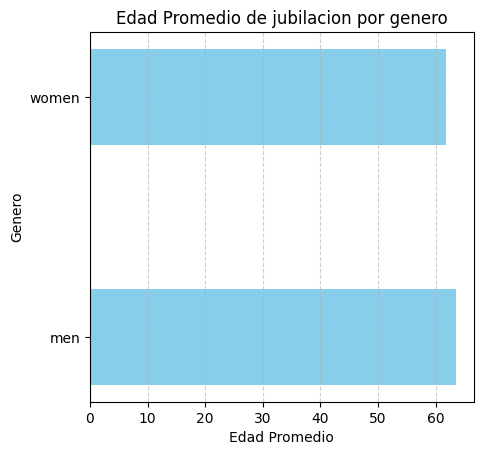

In [27]:
fig, ax=plt.subplots()
ax.barh(genero['Gender'],genero['Average Age'], color='skyblue', height=0.4)
ax.set_title("Edad Promedio de jubilacion por genero")
plt.subplots_adjust(left=0.2)
plt.subplots_adjust(right=0.8)
ax.set_xlabel('Edad Promedio')
ax.set_ylabel('Genero')
ax.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Aqui observamos que el promedio de las edades de jubilacion por genero supera los 60 años en ambos generos de los paises encuestados